In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
import sklearn
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('winequality-red.csv')
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [3]:
df.shape

(1599, 12)

In [4]:
df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [5]:
df.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


# Summary Statistics

In [7]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


Observations:-
    
1. The mean is more  than median for fixed acidity column only.
2. There is large difference between 75% and max in almost all columns.

# Exploring Target Variable

In [8]:
df['quality'].value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

We will seet an arbitrary cutoff for our dependent variable (wine quality) at e.g. 7 or higher getting classified as 'good/1'
and the remainder as 'not good/0'.

In [9]:
list=[]
for value in df['quality']:
    if value>=7:
        value=1
        list.append(value)
    else:
        value=0
        list.append(value)

In [10]:
list

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,


In [11]:
array=np.array([list])
array

array([[0, 0, 0, ..., 0, 0, 0]])

In [12]:
wine=pd.DataFrame(list,columns=['quality'])

In [13]:
wine

,quality
0,0
1,0
2,0
3,0
4,0
...,...
1594,0
1595,0
1596,0
1597,0


In [14]:
wine['quality'].value_counts()

0    1382
1     217
Name: quality, dtype: int64

In [15]:
df.drop('quality',axis=1,inplace=True)

In [16]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4


In [17]:
df_1=pd.concat((df,wine),axis=1)


In [18]:
df_1.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0


In [19]:
df_1['quality'].value_counts()

0    1382
1     217
Name: quality, dtype: int64

In [20]:
df_1.astype(str)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.7,0.0,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0
1,7.8,0.88,0.0,2.6,0.098,25.0,67.0,0.9968,3.2,0.68,9.8,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.997,3.26,0.65,9.8,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.998,3.16,0.58,9.8,0
4,7.4,0.7,0.0,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.6,0.08,2.0,0.09,32.0,44.0,0.9949,3.45,0.58,10.5,0
1595,5.9,0.55,0.1,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,0
1596,6.3,0.51,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,0
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,0


# Data visualizations

To check missing values

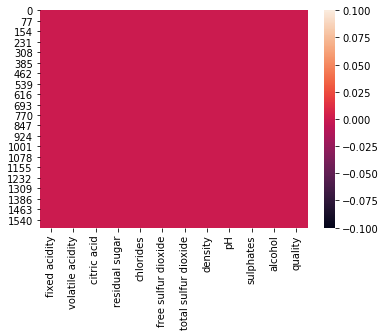

In [21]:
sns.heatmap(df_1.isnull())

Observations:-
    
1. There is no missing values in the dataset.

# Univariate Analysis

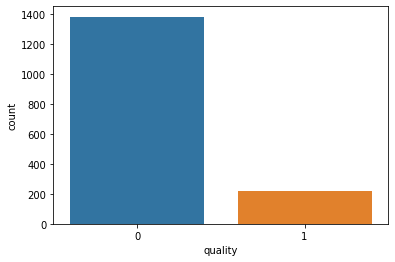

In [22]:
sns.countplot(x='quality',data=df_1)

Observations:-
    
1. Good quality Wines (1) are less than Bad quality Wines(0).  

# To check correlation

In [23]:
dfcor=df_1.corr()
dfcor

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.256131,0.671703,0.114777,0.093705,-0.153794,-0.113181,0.668047,-0.682978,0.183006,-0.061668,0.120061
volatile acidity,-0.256131,1.000000,-0.552496,0.001918,0.061298,-0.010504,0.076470,0.022026,0.234937,-0.260987,-0.202288,-0.270712
citric acid,0.671703,-0.552496,1.000000,0.143577,0.203823,-0.060978,0.035533,0.364947,-0.541904,0.312770,0.109903,0.214716
residual sugar,0.114777,0.001918,0.143577,1.000000,0.055610,0.187049,0.203028,0.355283,-0.085652,0.005527,0.042075,0.047779
chlorides,0.093705,0.061298,0.203823,0.055610,1.000000,0.005562,0.047400,0.200632,-0.265026,0.371260,-0.221141,-0.097308
free sulfur dioxide,-0.153794,-0.010504,-0.060978,0.187049,0.005562,1.000000,0.667666,-0.021946,0.070377,0.051658,-0.069408,-0.071747
total sulfur dioxide,-0.113181,0.076470,0.035533,0.203028,0.047400,0.667666,1.000000,0.071269,-0.066495,0.042947,-0.205654,-0.139517
density,0.668047,0.022026,0.364947,0.355283,0.200632,-0.021946,0.071269,1.000000,-0.341699,0.148506,-0.496180,-0.150460
pH,-0.682978,0.234937,-0.541904,-0.085652,-0.265026,0.070377,-0.066495,-0.341699,1.000000,-0.196648,0.205633,-0.057283
sulphates,0.183006,-0.260987,0.312770,0.005527,0.371260,0.051658,0.042947,0.148506,-0.196648,1.000000,0.093595,0.199485


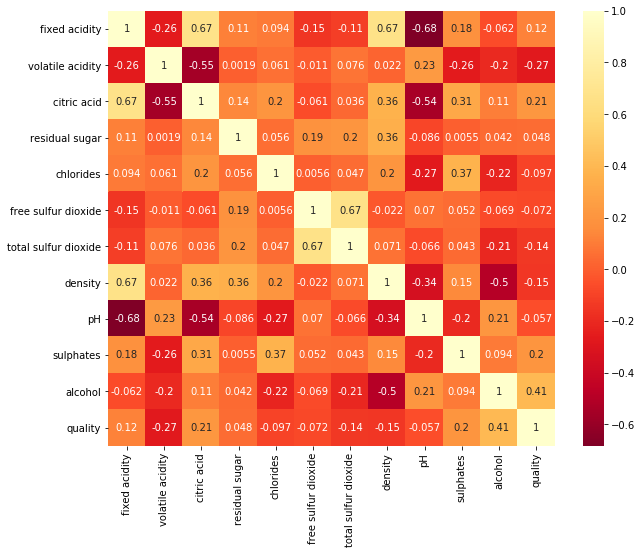

In [24]:
# Multivariate Analysis
plt.figure(figsize=(10,8))
sns.heatmap(dfcor,cmap='YlOrRd_r',annot=True)

Observations:-
    
1. Quality is highly positively correlated with alcohol.
2. Alcohol is highly negatively correlated with density.
3. Density is highly positively correlated with fixed acidity.
4. Volatile Acidity is highly negatively correlated with Quality.

# Bivariate Analysis

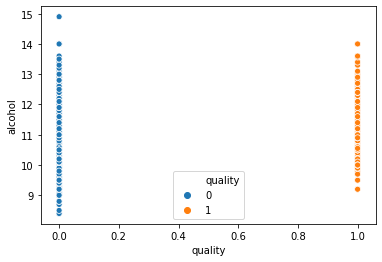

In [25]:
sns.scatterplot(x='quality',y='alcohol',data=df_1,hue='quality')

Observations:-
    
1. Bad quality wines have alcohol contents in almost all ranges ,i.e, 2-15.
2. Good quality wines have alcohol contents in the rangee of 9-14.

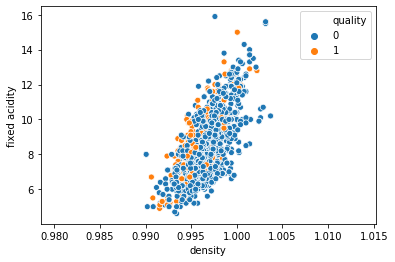

In [26]:
sns.scatterplot(x='density',y='fixed acidity',data=df_1,hue='quality')

Observations:-

1. Density and Fixed acidity are positively correlated.

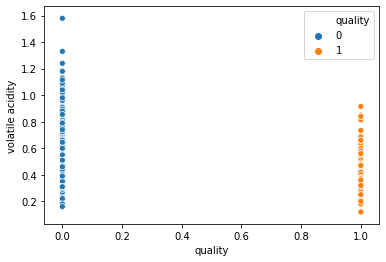

In [27]:
sns.scatterplot(x='quality',y='volatile acidity',data=df_1,hue='quality')

Observations:-
    
1. Bad quality wines have volatile acidity in almost all ranges ,i.e, 0.1-1.6.
2. Good quality wines have alcohol contents in the rangee of 0.1-0.9.

# Plotting Outliers

fixed acidity              AxesSubplot(0.125,0.657941;0.168478x0.222059)
volatile acidity        AxesSubplot(0.327174,0.657941;0.168478x0.222059)
citric acid             AxesSubplot(0.529348,0.657941;0.168478x0.222059)
residual sugar          AxesSubplot(0.731522,0.657941;0.168478x0.222059)
chlorides                  AxesSubplot(0.125,0.391471;0.168478x0.222059)
free sulfur dioxide     AxesSubplot(0.327174,0.391471;0.168478x0.222059)
total sulfur dioxide    AxesSubplot(0.529348,0.391471;0.168478x0.222059)
density                 AxesSubplot(0.731522,0.391471;0.168478x0.222059)
pH                            AxesSubplot(0.125,0.125;0.168478x0.222059)
sulphates                  AxesSubplot(0.327174,0.125;0.168478x0.222059)
alcohol                    AxesSubplot(0.529348,0.125;0.168478x0.222059)
quality                    AxesSubplot(0.731522,0.125;0.168478x0.222059)
dtype: object

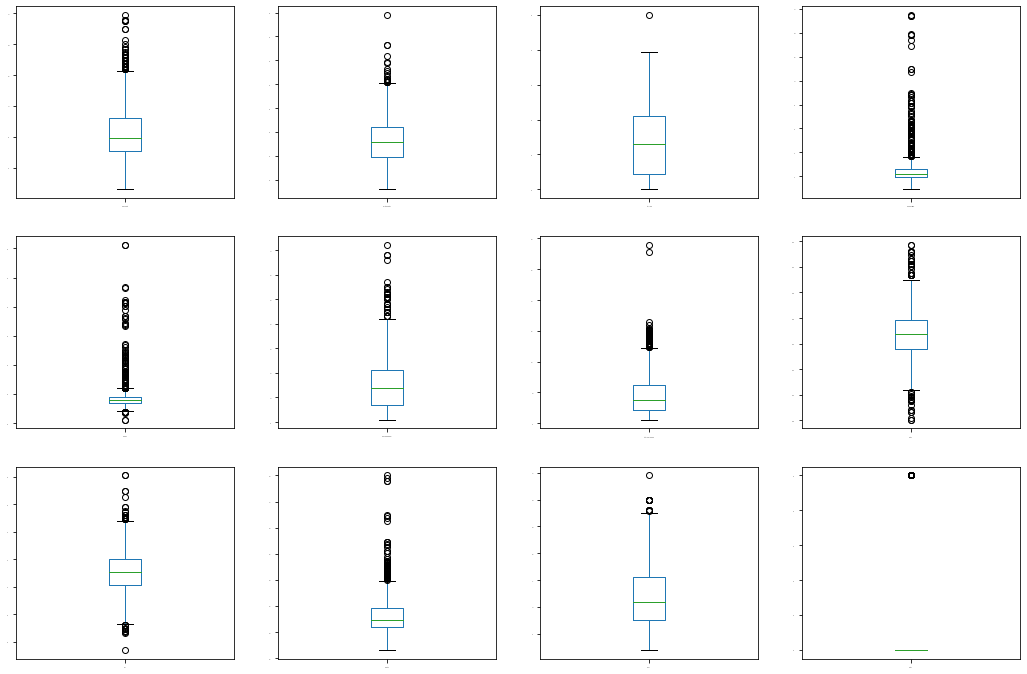

In [28]:
df_1.plot(kind='box',subplots=True,layout=(3,4),sharex=False,fontsize=1,figsize=(18,12))

Observations:-
    
1. All columns have outliers but some have many and some have few.

# Removing Outliers

In [29]:
df_1.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0


In [30]:
from scipy.stats import zscore
z=np.abs(zscore(df_1))
z

array([[0.52835961, 0.96187667, 1.39147228, ..., 0.57920652, 0.96024611,
        0.39625599],
       [0.29854743, 1.96744245, 1.39147228, ..., 0.1289504 , 0.58477711,
        0.39625599],
       [0.29854743, 1.29706527, 1.18607043, ..., 0.04808883, 0.58477711,
        0.39625599],
       ...,
       [1.1603431 , 0.09955388, 0.72391627, ..., 0.54204194, 0.54162988,
        0.39625599],
       [1.39015528, 0.65462046, 0.77526673, ..., 0.30598963, 0.20930812,
        0.39625599],
       [1.33270223, 1.21684919, 1.02199944, ..., 0.01092425, 0.54162988,
        0.39625599]])

In [31]:
threshold=3
df_new=df_1[(z<3).all(axis=1)]

In [32]:
df_new.shape

(1458, 12)

In [33]:
df_1.shape

(1599, 12)

In [34]:
#141 removes are removed as outliers

In [35]:
((1599-1458)/1599)*100

8.818011257035648

In [36]:
df_1=df_new

In [37]:
df_1.shape

(1458, 12)

# To check skewness

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000225BDFEB588>,
      dtype=object)

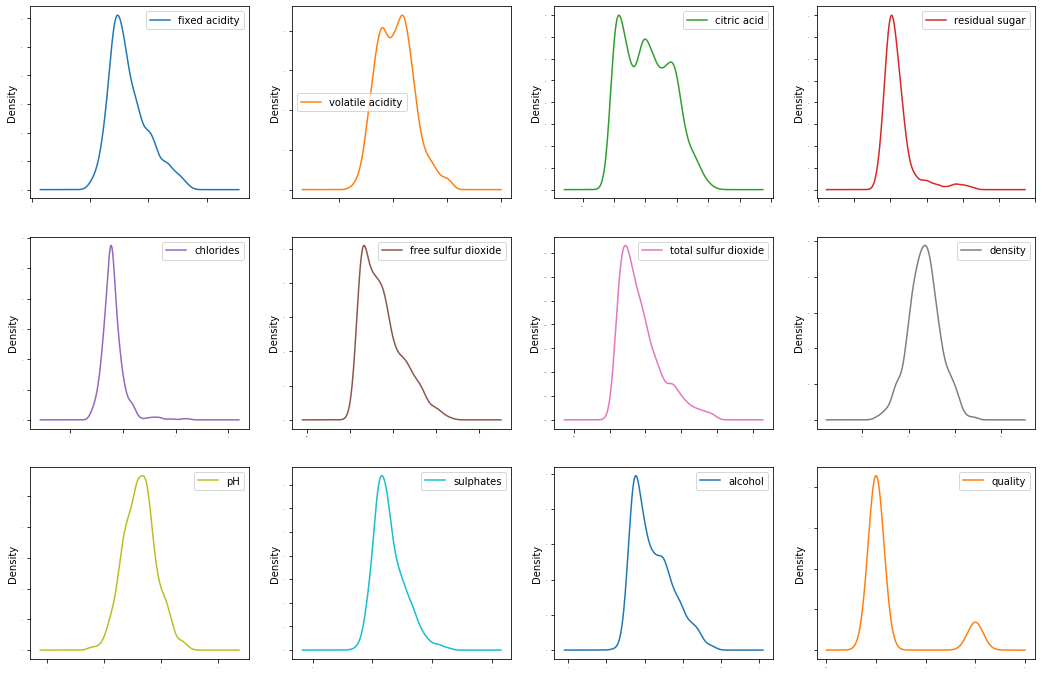

In [38]:
df_1.plot(kind='density',subplots=True,layout=(3,4),sharex=False,fontsize=1,figsize=(18,12))

Observations :-
    
1. fixed acidity, residual sugar, chlorides, free sulfur dioxide, total sulfur dioxide, sulphates, alcohol and quality are 
   right skewed.

In [39]:
df_1.skew()

fixed acidity           0.820879
volatile acidity        0.392097
citric acid             0.292600
residual sugar          2.450707
chlorides               2.307274
free sulfur dioxide     0.869727
total sulfur dioxide    1.185230
density                 0.055543
pH                      0.113039
sulphates               0.893297
alcohol                 0.757396
quality                 2.103030
dtype: float64

In [40]:
list=['fixed acidity', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'sulphates', 'alcohol']
for val in list:
    if df_1.skew().loc[val]>0.55:
        df_1[val]=np.log(df_1[val])


In [41]:
df_1.skew()

fixed acidity           0.377100
volatile acidity        0.392097
citric acid             0.292600
residual sugar          1.229070
chlorides               0.528828
free sulfur dioxide    -0.300264
total sulfur dioxide   -0.095735
density                 0.055543
pH                      0.113039
sulphates               0.345344
alcohol                 0.588835
quality                 2.103030
dtype: float64

In [42]:
list=[ 'alcohol','residual sugar' ]
for val in list:
    if df_1.skew().loc[val]>0.55:
        df_1[val]=np.sqrt(df_1[val])

In [43]:
df_1.skew()

fixed acidity           0.377100
volatile acidity        0.392097
citric acid             0.292600
residual sugar          0.560777
chlorides               0.528828
free sulfur dioxide    -0.300264
total sulfur dioxide   -0.095735
density                 0.055543
pH                      0.113039
sulphates               0.345344
alcohol                 0.554681
quality                 2.103030
dtype: float64

In [44]:
list=[ 'alcohol','residual sugar' ]
for val in list:
    if df_1.skew().loc[val]>0.55:
        df_1[val]=np.log(df_1[val])

In [45]:
df_1.skew()

fixed acidity           0.377100
volatile acidity        0.392097
citric acid             0.292600
residual sugar         -0.206392
chlorides               0.528828
free sulfur dioxide    -0.300264
total sulfur dioxide   -0.095735
density                 0.055543
pH                      0.113039
sulphates               0.345344
alcohol                 0.520903
quality                 2.103030
dtype: float64

In [46]:
df_1.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [47]:
x=df_1[['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol']]

x.head()
x.shape
y=df_1['quality']

y.unique()

array([0, 1], dtype=int64)

# Solution of Class Imbalance

In [48]:
import imblearn

In [49]:
from imblearn.over_sampling import SMOTE

In [50]:
SM=SMOTE()

In [51]:
x_over,y_over=SM.fit_resample(x,y)

In [52]:
y=pd.DataFrame(y_over,columns=['quality'])
x=pd.DataFrame(x_over,columns=['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol'])

In [53]:
df=pd.concat((x,y),axis=1)

In [54]:
df['quality'].value_counts()

1    1257
0    1257
Name: quality, dtype: int64

In [55]:
df.shape

(2514, 12)

In [56]:
x=df[['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol']]

y=df['quality']

y.value_counts()

1    1257
0    1257
Name: quality, dtype: int64

# Scaling

In [57]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x=sc.fit_transform(x)

In [58]:
x=pd.DataFrame(x)

In [59]:
x.columns=['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol']

In [60]:
x.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,-0.614577,1.385267,-1.612862,-0.626451,-0.010554,-0.076028,0.148676,0.791243,1.493154,-0.969507,-1.437461
1,-0.345592,2.487861,-1.612862,0.541837,1.098113,1.151493,1.153224,0.228968,-0.771396,0.047500,-1.002062
2,-0.345592,1.752798,-1.404354,0.138627,0.822602,0.387712,0.833779,0.341423,-0.333096,-0.188845,-1.002062
3,1.502987,-1.187452,1.306255,-0.626451,-0.068314,0.574855,0.989809,0.903699,-1.063596,-0.785696,-1.002062
4,-0.614577,1.385267,-1.612862,-0.626451,-0.010554,-0.076028,0.148676,0.791243,1.493154,-0.969507,-1.437461


In [61]:
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [62]:
from sklearn.model_selection import train_test_split
maxAccu=0
maxRS=0
for i in range(1,200):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.22,random_state=i)
    lm=LogisticRegression()
    lm.fit(x_train,y_train)
    pred=lm.predict(x_test)
    print('Accuracy score of Logistic Regression','is:')
    accu_score=accuracy_score(y_test,pred)
    print(accuracy_score(y_test,pred))
    print(confusion_matrix(y_test,pred))
    print(classification_report(y_test,pred))
    if accu_score>maxAccu:
        maxAccu=accu_score
        maxRS=i
        
print("Best accuracy is",maxAccu,"on Random_state",maxRS)

Accuracy score of Logistic Regression is:
0.8321299638989169
[[227  44]
 [ 49 234]]
              precision    recall  f1-score   support

           0       0.82      0.84      0.83       271
           1       0.84      0.83      0.83       283

    accuracy                           0.83       554
   macro avg       0.83      0.83      0.83       554
weighted avg       0.83      0.83      0.83       554

Accuracy score of Logistic Regression is:
0.8339350180505415
[[217  50]
 [ 42 245]]
              precision    recall  f1-score   support

           0       0.84      0.81      0.83       267
           1       0.83      0.85      0.84       287

    accuracy                           0.83       554
   macro avg       0.83      0.83      0.83       554
weighted avg       0.83      0.83      0.83       554

Accuracy score of Logistic Regression is:
0.8104693140794224
[[217  54]
 [ 51 232]]
              precision    recall  f1-score   support

           0       0.81      0.80      

Best accuracy is 0.8537906137184116 on Random_state 105

# Algorithms

In [63]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.22,random_state=105)
lm=LogisticRegression()
lm.fit(x_train,y_train)
pred=lm.predict(x_test)
print('Accuracy score of Logistic Regression','is:')
accu_score=accuracy_score(y_test,pred)
print(accuracy_score(y_test,pred))
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

Accuracy score of Logistic Regression is:
0.8411552346570397
[[239  40]
 [ 48 227]]
              precision    recall  f1-score   support

           0       0.83      0.86      0.84       279
           1       0.85      0.83      0.84       275

    accuracy                           0.84       554
   macro avg       0.84      0.84      0.84       554
weighted avg       0.84      0.84      0.84       554



Accuracy score of Logistic Regression is: 0.8411552346570397


In [64]:
dtc=DecisionTreeClassifier()
dtc.fit(x_train,y_train)
preddtc=dtc.predict(x_test)
print('Accuracy score of DecisionTreeClassifier','is:')
accu_score=accuracy_score(y_test,preddtc)
print(accuracy_score(y_test,preddtc))
print(confusion_matrix(y_test,preddtc))
print(classification_report(y_test,preddtc))

Accuracy score of DecisionTreeClassifier is:
0.9061371841155235
[[256  23]
 [ 29 246]]
              precision    recall  f1-score   support

           0       0.90      0.92      0.91       279
           1       0.91      0.89      0.90       275

    accuracy                           0.91       554
   macro avg       0.91      0.91      0.91       554
weighted avg       0.91      0.91      0.91       554



Accuracy score of DecisionTreeClassifier is: 0.9061371841155235

In [65]:
knn=KNeighborsClassifier(n_neighbors=5)
knn.fit(x_train,y_train)
predknn=knn.predict(x_test)
print('Accuracy score of knn','is:')
accu_score=accuracy_score(y_test,pred)
print(accuracy_score(y_test,pred))
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

Accuracy score of knn is:
0.8411552346570397
[[239  40]
 [ 48 227]]
              precision    recall  f1-score   support

           0       0.83      0.86      0.84       279
           1       0.85      0.83      0.84       275

    accuracy                           0.84       554
   macro avg       0.84      0.84      0.84       554
weighted avg       0.84      0.84      0.84       554



Accuracy score of knn is: 0.8411552346570397

In [66]:
svm=SVC()
svm.fit(x_train,y_train)
predsvc=svm.predict(x_test)
print('Accuracy score of knn','is:')
accu_score=accuracy_score(y_test,predsvc)
print(accuracy_score(y_test,predsvc))
print(confusion_matrix(y_test,predsvc))
print(classification_report(y_test,predsvc))

Accuracy score of knn is:
0.907942238267148
[[250  29]
 [ 22 253]]
              precision    recall  f1-score   support

           0       0.92      0.90      0.91       279
           1       0.90      0.92      0.91       275

    accuracy                           0.91       554
   macro avg       0.91      0.91      0.91       554
weighted avg       0.91      0.91      0.91       554



Accuracy score of knn is: 0.907942238267148


In [67]:
bnb=GaussianNB()
bnb.fit(x_train,y_train)
predbnb=bnb.predict(x_test)
print('Accuracy score of BinomialNB','is:')
accu_score=accuracy_score(y_test,predbnb)
print(accuracy_score(y_test,predbnb))
print(confusion_matrix(y_test,predbnb))
print(classification_report(y_test,predbnb))

Accuracy score of BinomialNB is:
0.8303249097472925
[[238  41]
 [ 53 222]]
              precision    recall  f1-score   support

           0       0.82      0.85      0.84       279
           1       0.84      0.81      0.83       275

    accuracy                           0.83       554
   macro avg       0.83      0.83      0.83       554
weighted avg       0.83      0.83      0.83       554



Accuracy score of BinomialNB is: 0.8303249097472925


In [68]:
# Ensembler Techniques

from sklearn.ensemble import RandomForestClassifier

rf=RandomForestClassifier()
rf.fit(x_train,y_train)
predrf=rf.predict(x_test)
print('Accuracy score of RandomForestClassifier','is:')
accu_score=accuracy_score(y_test,predrf)
print(accuracy_score(y_test,predrf))
print(confusion_matrix(y_test,predrf))
print(classification_report(y_test,predrf))

Accuracy score of RandomForestClassifier is:
0.9494584837545126
[[264  15]
 [ 13 262]]
              precision    recall  f1-score   support

           0       0.95      0.95      0.95       279
           1       0.95      0.95      0.95       275

    accuracy                           0.95       554
   macro avg       0.95      0.95      0.95       554
weighted avg       0.95      0.95      0.95       554



Accuracy score of RandomForestClassifier is: 0.9494584837545126


In [69]:
from sklearn.ensemble import AdaBoostClassifier

ad=AdaBoostClassifier()
ad.fit(x_train,y_train)
predad=ad.predict(x_test)
print('Accuracy score of AdaBoostClassifier','is:')
accu_score=accuracy_score(y_test,predad)
print(accuracy_score(y_test,predad))
print(confusion_matrix(y_test,predad))
print(classification_report(y_test,predad))

Accuracy score of AdaBoostClassifier is:
0.8898916967509025
[[254  25]
 [ 36 239]]
              precision    recall  f1-score   support

           0       0.88      0.91      0.89       279
           1       0.91      0.87      0.89       275

    accuracy                           0.89       554
   macro avg       0.89      0.89      0.89       554
weighted avg       0.89      0.89      0.89       554



Accuracy score of AdaBoostClassifier is: 0.8898916967509025

# Cross Validation Score

In [70]:
from sklearn.model_selection import cross_val_score
rfscores=cross_val_score(rf,x,y,cv=5)
print(rfscores)
print(rfscores.mean(),rfscores.std())

[0.97415507 0.90854871 0.93638171 0.85089463 0.91035857]
0.9160677370042691 0.0403074675979661


In [91]:
svmscores=cross_val_score(svm,x,y,cv=5)
print(svmscores)
print(svmscores.mean(),svmscores.std())

[0.93638171 0.82703777 0.89463221 0.81908549 0.87649402]
0.8707262401685505 0.04356799918431491


In [92]:
list1=[0.9494584837545126,0.907942238267148]
list2=[0.9160677370042691,0.8707262401685505 ]
difference=[]
zip_object = zip(list1, list2)
for list1_i, list2_i in zip_object:
    difference.append(list1_i-list2_i)


print(difference)


[0.03339074675024345, 0.03721599809859755]


# Random Forest is the best algorithm

# Hyper Parameter Tuning

In [73]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.22,random_state=105)
rf=RandomForestClassifier()
grid_param={'criterion':['gini','entropy']}
gd_sr=GridSearchCV(estimator=rf,param_grid=grid_param,scoring='accuracy',cv=5)
gd_sr.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy']}, scoring='accuracy')

In [74]:
gd_sr.best_params_

{'criterion': 'gini'}

In [75]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.22,random_state=105)
rf=RandomForestClassifier()
grid_param={'max_features':['auto','sqrt','log2']}
gd_sr=GridSearchCV(estimator=rf,param_grid=grid_param,scoring='accuracy',cv=5)
gd_sr.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_features': ['auto', 'sqrt', 'log2']},
             scoring='accuracy')

In [76]:
gd_sr.best_params_

{'max_features': 'sqrt'}

In [77]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.22,random_state=105)
rf=RandomForestClassifier()
grid_param={'n_estimators':[25,50,75,100]}
gd_sr=GridSearchCV(estimator=rf,param_grid=grid_param,scoring='accuracy',cv=5)
gd_sr.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'n_estimators': [25, 50, 75, 100]},
             scoring='accuracy')

In [78]:
gd_sr.best_params_

{'n_estimators': 100}

In [79]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.22,random_state=108)
rf=RandomForestClassifier()
grid_param={'max_depth':[None,int]}
gd_sr=GridSearchCV(estimator=rf,param_grid=grid_param,scoring='accuracy',cv=5)
gd_sr.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [None, <class 'int'>]},
             scoring='accuracy')

In [80]:
gd_sr.best_params_

{'max_depth': None}

In [81]:
rf_hp=RandomForestClassifier(n_estimators=100,max_depth=None,max_features='sqrt',criterion='gini')
rf_hp.fit(x_train,y_train)
predrf=rf_hp.predict(x_test)
print('Accuracy score of RandomForestClassifier','is:')
accu_score=accuracy_score(y_test,predrf)
print(accuracy_score(y_test,predrf))
print(confusion_matrix(y_test,predrf))
print(classification_report(y_test,predrf))

Accuracy score of RandomForestClassifier is:
0.9422382671480144
[[256  20]
 [ 12 266]]
              precision    recall  f1-score   support

           0       0.96      0.93      0.94       276
           1       0.93      0.96      0.94       278

    accuracy                           0.94       554
   macro avg       0.94      0.94      0.94       554
weighted avg       0.94      0.94      0.94       554



In [82]:
rf=RandomForestClassifier()
rf.fit(x_train,y_train)
predrf=rf.predict(x_test)
print('Accuracy score of RandomForestClassifier','is:')
accu_score=accuracy_score(y_test,predrf)
print(accuracy_score(y_test,predrf))
print(confusion_matrix(y_test,predrf))
print(classification_report(y_test,predrf))

Accuracy score of RandomForestClassifier is:
0.9368231046931408
[[256  20]
 [ 15 263]]
              precision    recall  f1-score   support

           0       0.94      0.93      0.94       276
           1       0.93      0.95      0.94       278

    accuracy                           0.94       554
   macro avg       0.94      0.94      0.94       554
weighted avg       0.94      0.94      0.94       554



In [83]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

In [93]:
y_pred_prob=rf_hp.predict_proba(x_test)[:,1]

In [94]:
y_pred_prob

array([0.05, 1.  , 0.98, 0.03, 0.8 , 0.9 , 0.94, 0.98, 0.97, 0.  , 0.96,
       0.98, 0.02, 0.  , 0.99, 0.92, 0.99, 0.26, 1.  , 0.05, 0.22, 1.  ,
       0.  , 0.27, 0.  , 0.96, 0.06, 0.05, 0.13, 0.99, 0.04, 0.6 , 0.69,
       0.13, 0.92, 0.05, 0.18, 0.83, 0.  , 0.01, 0.86, 0.01, 0.27, 0.72,
       0.84, 0.03, 0.98, 0.02, 0.98, 0.02, 0.98, 0.5 , 0.59, 0.79, 0.01,
       0.05, 0.05, 0.39, 0.92, 0.63, 1.  , 0.08, 0.06, 0.21, 0.02, 1.  ,
       0.84, 0.8 , 0.97, 0.58, 0.65, 1.  , 0.94, 0.03, 0.05, 0.97, 0.58,
       1.  , 1.  , 0.01, 0.17, 0.04, 0.33, 0.1 , 0.7 , 0.95, 0.1 , 0.  ,
       1.  , 0.08, 0.07, 0.56, 0.05, 0.99, 1.  , 0.98, 0.96, 0.98, 0.93,
       0.83, 0.19, 0.01, 0.48, 0.05, 0.02, 0.31, 0.99, 0.98, 0.03, 1.  ,
       0.75, 0.44, 0.76, 0.96, 0.99, 0.91, 0.94, 0.97, 0.96, 0.  , 0.96,
       0.96, 0.1 , 1.  , 0.05, 0.87, 0.36, 0.78, 0.  , 0.12, 0.98, 0.02,
       0.79, 0.31, 0.06, 0.87, 0.91, 0.93, 1.  , 0.92, 0.2 , 0.65, 1.  ,
       0.82, 0.06, 0.82, 0.  , 0.1 , 0.25, 0.02, 0.

In [95]:
fpr,tpr,thresholds=roc_curve(y_test,y_pred_prob)

In [96]:
fpr

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.00362319, 0.00362319, 0.00362319,
       0.00724638, 0.00724638, 0.00724638, 0.00724638, 0.01086957,
       0.01086957, 0.01086957, 0.02173913, 0.02536232, 0.02536232,
       0.0326087 , 0.03985507, 0.04710145, 0.05072464, 0.05072464,
       0.05072464, 0.05434783, 0.05434783, 0.05434783, 0.05797101,
       0.05797101, 0.05797101, 0.06521739, 0.07608696, 0.07608696,
       0.07608696, 0.07971014, 0.08333333, 0.09057971, 0.09057971,
       0.0942029 , 0.10144928, 0.10507246, 0.11594203, 0.12318841,
       0.12681159, 0.13405797, 0.14130435, 0.14492754, 0.16666667,
       0.18115942, 0.19202899, 0.19565217, 0.19927536, 0.20652174,
       0.2173913 , 0.23550725, 0.25      , 0.26449275, 0.27536232,
       0.27898551, 0.30434783, 0.3115942 , 0.32608696, 0.36956

In [97]:
tpr

array([0.        , 0.17266187, 0.24100719, 0.33093525, 0.39928058,
       0.45323741, 0.48201439, 0.53956835, 0.62589928, 0.67266187,
       0.6942446 , 0.70143885, 0.72302158, 0.73381295, 0.73741007,
       0.74820144, 0.76618705, 0.77697842, 0.79136691, 0.80215827,
       0.81654676, 0.83093525, 0.8381295 , 0.84172662, 0.84892086,
       0.85251799, 0.85971223, 0.85971223, 0.86330935, 0.87769784,
       0.88489209, 0.88489209, 0.89208633, 0.89928058, 0.91366906,
       0.92086331, 0.92805755, 0.93165468, 0.93884892, 0.94604317,
       0.95323741, 0.95683453, 0.95683453, 0.95683453, 0.96402878,
       0.9676259 , 0.9676259 , 0.97122302, 0.97482014, 0.97841727,
       0.97841727, 0.97841727, 0.97841727, 0.97841727, 0.97841727,
       0.98201439, 0.98201439, 0.98201439, 0.98561151, 0.98561151,
       0.98561151, 0.98920863, 0.98920863, 0.99280576, 0.99280576,
       0.99640288, 0.99640288, 0.99640288, 0.99640288, 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.     

In [98]:
thresholds

array([2.  , 1.  , 0.99, 0.98, 0.97, 0.96, 0.95, 0.94, 0.91, 0.9 , 0.89,
       0.88, 0.87, 0.86, 0.85, 0.84, 0.83, 0.82, 0.81, 0.8 , 0.79, 0.78,
       0.77, 0.76, 0.75, 0.74, 0.73, 0.72, 0.71, 0.69, 0.68, 0.66, 0.65,
       0.64, 0.63, 0.61, 0.6 , 0.59, 0.58, 0.57, 0.56, 0.54, 0.53, 0.5 ,
       0.48, 0.47, 0.46, 0.44, 0.42, 0.41, 0.4 , 0.39, 0.38, 0.37, 0.36,
       0.33, 0.31, 0.29, 0.28, 0.26, 0.25, 0.24, 0.23, 0.22, 0.21, 0.2 ,
       0.19, 0.18, 0.16, 0.15, 0.14, 0.13, 0.12, 0.11, 0.1 , 0.09, 0.06,
       0.05, 0.04, 0.03, 0.02, 0.01, 0.  ])

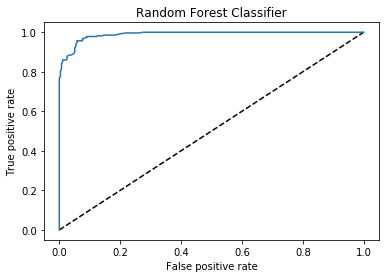

In [99]:
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label='Random Forest')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('Random Forest Classifier')
plt.show()

Observations :-
    
1. As the line is moving towards 1, so we can conclude that we have developed good model.

# Saving the model

In [100]:
import joblib 

In [101]:
joblib.dump(rf_hp,"rf_red_wine_quality.obj")

['rf_red_wine_quality.obj']